0) Show all your code to acquire the dataset in your notebook. If you fail to show how you acquired
the dataset, you will earn a zero on the assignment.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import us

In [2]:
##due to query limit, query each year then concat dataframes into single df
# end date is exclusive so include following date

In [3]:
url="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2017-01-01&minmagnitude=4"
response = requests.get(url)
print(response.status_code)
df = pd.read_csv(url)

200


In [4]:
url2="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2018-01-01&minmagnitude=4"
response = requests.get(url2)
print(response.status_code)
df2 = pd.read_csv(url2)

200


In [5]:
url3="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2019-01-01&minmagnitude=4"
response = requests.get(url3)
print(response.status_code)
df3 = pd.read_csv(url3)

200


In [6]:
url4="https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-02&minmagnitude=4"
response = requests.get(url4)
print(response.status_code)
df4 = pd.read_csv(url4)

200


In [7]:
dfx=pd.concat([df4,df3,df2,df]) 
dfx=dfx[dfx.type=='earthquake']#a few type are not earthquake filter out

In [8]:
dfx.shape

(52954, 22)

In [9]:
dfx.type.unique()

array(['earthquake'], dtype=object)

In [10]:
dfx.head()

time  latitude  longitude   depth  mag magType  nst  \
0  2019-10-01T22:25:08.298Z  -22.5884   -10.6237   10.00  5.2     mww  NaN   
1  2019-10-01T19:57:10.204Z  -55.2500   158.4184   10.00  5.5     mww  NaN   
2  2019-10-01T19:23:46.513Z  -23.6804   -66.9094  206.73  4.6     mwr  NaN   
3  2019-10-01T16:31:54.550Z  -53.3583    24.5880   10.00  4.3      mb  NaN   
4  2019-10-01T15:00:53.359Z  -17.8787  -178.1656  554.46  4.4      mb  NaN   

     gap    dmin   rms    ...                      updated  \
0   43.0   8.042  0.93    ...     2019-10-01T22:44:29.040Z   
1   96.0  10.487  1.03    ...     2019-10-02T19:59:12.917Z   
2   69.0   1.373  1.24    ...     2019-10-03T15:18:38.040Z   
3  117.0  21.927  0.58    ...     2019-10-10T19:15:40.040Z   
4   99.0   3.551  0.47    ...     2019-10-10T19:01:17.040Z   

                                             place        type  \
0                      Southern Mid-Atlantic Ridge  earthquake   
1          91km SSW of Macquarie Island, Australia  earthquake   
2  84km NW of San Antonio de los Cobres, Argentina  earthquake   
3                                  South of Africa  earthquake   
4                                      Fiji region  earthquake   

  horizontalError depthError  magError  magNst    status  locationSource  \
0             9.6        1.8     0.089    12.0  reviewed              us   
1            10.8        1.9     0.059    28.0  reviewed              us   
2             8.5        7.7       NaN     NaN  reviewed              us   
3            17.5        1.9     0.178     9.0  reviewed              us   
4            15.7       11.5     0.105    26.0  reviewed              us   

  magSource  
0        us  
1        us  
2       guc  
3        us  
4        us  

[5 rows x 22 columns]

1) Use describe to get the basic statistics of all the columns (5 points)

In [11]:
dfx.describe()

latitude     longitude         depth           mag         nst  \
count  52954.000000  52954.000000  52954.000000  52954.000000  337.000000   
mean       1.883633     34.098985     94.241309      4.526330   47.314540   
std       28.964028    124.268231    147.872715      0.397896   35.342401   
min      -79.983700   -179.998600     -0.930000      4.000000    4.000000   
25%      -19.518425    -74.363000     10.000000      4.300000   23.000000   
50%       -3.359400     94.024600     33.930000      4.500000   37.000000   
75%       24.316825    141.909975    106.187500      4.700000   64.000000   
max       86.996400    179.999300    690.950000      8.200000  289.000000   

                gap          dmin           rms  horizontalError  \
count  52109.000000  52064.000000  52954.000000     52512.000000   
mean     110.728990      3.713559      0.827329         8.754859   
std       51.023383      4.738024      0.262198         3.650879   
min        7.000000      0.000000      0.000000         0.000000   
25%       73.000000      1.173000      0.650000         6.300000   
50%      106.000000      2.382000      0.810000         8.200000   
75%      142.000000      4.399250      0.990000        10.800000   
max      346.000000     62.626000      2.530000        51.700000   

         depthError      magError        magNst  
count  52954.000000  51239.000000  51380.000000  
mean       5.449731      0.121075     42.226800  
std        4.190587      0.065077     61.170229  
min        0.000000      0.000000      0.000000  
25%        1.900000      0.073000     12.000000  
50%        4.800000      0.112000     21.000000  
75%        7.900000      0.153000     45.000000  
max       69.300000      1.000000    854.000000

2) Get the top 10 earthquakes by magnitude (5 points)

In [12]:
dfx.sort_values(by=['mag'], ascending=False).head(10)

time  latitude  longitude   depth  mag magType  \
4525   2017-09-08T04:49:19.180Z   15.0222   -93.8993   47.39  8.2     mww   
6256   2018-08-19T00:19:40.670Z  -18.1125  -178.1530  600.00  8.2     mww   
4562   2019-05-26T07:41:15.073Z   -5.8119   -75.2697  122.57  8.0     mww   
789    2016-12-17T10:51:10.500Z   -4.5049   153.5216   94.54  7.9     mww   
5168   2018-09-06T15:49:18.710Z  -18.4743   179.3502  670.81  7.9     mww   
13823  2018-01-23T09:31:40.890Z   56.0039  -149.1658   14.06  7.9     mww   
12311  2017-01-22T04:30:22.960Z   -6.2464   155.1718  135.00  7.9     mww   
1335   2016-12-08T17:38:46.280Z  -10.6812   161.3273   40.00  7.8     mww   
13093  2016-03-02T12:49:48.110Z   -4.9521    94.3299   24.00  7.8     mww   
11284  2016-04-16T23:58:36.980Z    0.3819   -79.9218   20.59  7.8     mww   

       nst   gap   dmin   rms    ...                      updated  \
4525   NaN  22.0  0.944  1.22    ...     2019-09-12T03:25:23.535Z   
6256   NaN  13.0  3.630  0.79    ...     2019-08-19T06:18:42.402Z   
4562   NaN  17.0  3.180  0.84    ...     2019-10-20T00:29:23.662Z   
789    NaN  13.0  1.389  0.97    ...     2018-10-17T21:50:55.380Z   
5168   NaN  12.0  1.431  1.07    ...     2019-04-23T04:45:27.592Z   
13823  NaN  30.0  2.585  0.77    ...     2019-07-01T15:34:15.502Z   
12311  NaN   9.0  3.625  1.22    ...     2018-10-17T21:53:19.164Z   
1335   NaN  13.0  1.836  0.88    ...     2018-10-17T21:50:46.404Z   
13093  NaN  20.0  7.009  1.14    ...     2018-12-04T22:30:13.007Z   
11284  NaN  15.0  1.440  0.94    ...     2019-10-15T14:06:57.770Z   

                                       place        type horizontalError  \
4525         101km SSW of Tres Picos, Mexico  earthquake             6.2   
6256          286km NNE of Ndoi Island, Fiji  earthquake             9.6   
4562                78km SE of Lagunas, Peru  earthquake             7.0   
789        54km E of Taron, Papua New Guinea  earthquake             7.3   
5168                 102km ESE of Suva, Fiji  earthquake             9.5   
13823             280km SE of Kodiak, Alaska  earthquake             6.0   
12311  35km WNW of Panguna, Papua New Guinea  earthquake             7.3   
1335   69km WSW of Kirakira, Solomon Islands  earthquake             8.3   
13093        Southwest of Sumatra, Indonesia  earthquake             7.5   
11284            27km SSE of Muisne, Ecuador  earthquake             5.7   

      depthError  magError  magNst    status  locationSource magSource  
4525         3.7     0.058    29.0  reviewed              us        us  
6256         1.9     0.045    47.0  reviewed              us        us  
4562         4.0     0.036    75.0  reviewed              us        us  
789          3.8       NaN     NaN  reviewed              us        us  
5168         2.8     0.025   157.0  reviewed              us        us  
13823        2.8     0.034    81.0  reviewed              us        us  
12311        1.8     0.042    54.0  reviewed              us        us  
1335         1.8       NaN     NaN  reviewed              us        us  
13093        1.8       NaN     NaN  reviewed              us        us  
11284        3.2       NaN     NaN  reviewed              us        us  

[10 rows x 22 columns]

3) Handle all Null/empty data by filling it with zeros (10 points)

In [13]:
dfx=dfx.fillna(0)

4) Find the top 10 places where the strongest earthquakes occurred (15 points)

In [14]:
for place in list(dfx.sort_values(by=['mag'], ascending=False).head(10)['place'].values):
    print(place.split("of ")[1])

Tres Picos, Mexico
Ndoi Island, Fiji
Lagunas, Peru
Taron, Papua New Guinea
Suva, Fiji
Kodiak, Alaska
Panguna, Papua New Guinea
Kirakira, Solomon Islands
Sumatra, Indonesia
Muisne, Ecuador


5) Find the top 10 places where the weakest earthquakes occurred (15 points)

In [15]:
for place in list(dfx.sort_values(by=['mag'], ascending=True).head(10)['place'].values):
    print(place.split("of ")[1])

Shizunai, Japan
Grytviken, South Georgia and the South Sandwich Islands
Ocos, Guatemala
Grytviken, South Georgia and the South Sandwich Islands
Pagan, Northern Mariana Islands
San Pedro de Atacama, Chile
Isimu, Indonesia
Leksula, Indonesia
Roshtqal'a, Tajikistan
Atka, Alaska


6) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following
magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5:
(7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

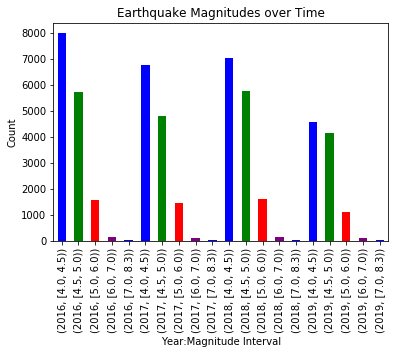

In [16]:
dates=[]
for date in list(dfx['time'].values):
    dates+=[date[:4]]

dfx['year']=dates

grouped=dfx.groupby(['year',pd.cut(dfx['mag'], np.array([4.0,4.5,5.0,6.0,7.0,dfx['mag'].max()]), right=False)], sort=True).count()['time']

### by dropping values that equal 7 we make interval exclusive  on 7.0 on both sides  
### and by adding .1 to max() we are inclusive on the right
### Graph will plot wrong interval with inclusive on the 7
dfy=dfx[dfx.mag != 7]
grouped=dfy.groupby(['year',pd.cut(dfy['mag'], np.array([4.0,4.5,5.0,6.0,7.0,dfy['mag'].max()+.1]),right=False)], sort=True).count()['time']
dfx.drop('year', axis=1)


grouped.plot(kind='bar',color=['blue', 'green', 'red','purple'])
plt.title('Earthquake Magnitudes over Time')
plt.xlabel('Year:Magnitude Interval')
plt.ylabel('Count');

7) Find the 10 countries with the highest number of earthquakes (30 points) (Note: Yes, this is only
countries, not full place)

In [17]:
##note:states in the US are treated as a country since we don't map them to the USA.
##USA total earthquakes 2121 placing it higher than Philippines as seen from grad stud question
country=[]
for place in list(dfx['place'].values):
    country+=[place.split(", ")[-1]]

dfx['country']=country
print(dfx.groupby('country').count().sort_values('time', ascending=False)['time'].head(10))
dfx=dfx.drop('country', axis=1)

country
Indonesia           6578
Japan               3422
Papua New Guinea    3091
Fiji                2530
New Zealand         2392
Chile               2301
Philippines         2087
Alaska              1840
Russia              1757
Tonga               1569
Name: time, dtype: int64


8) Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake
count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?
(20 points) Please add labels and colors to the plot.

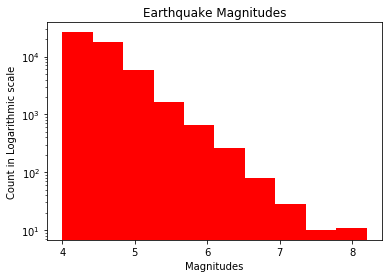

In [18]:
plt.hist(dfx['mag'],color='red')#one color per dataset allowed
plt.yscale('log', nonposy='clip')
plt.title('Earthquake Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Count in Logarithmic scale');
#Appears to be an exponential decay relationship between count and Magnitude of earthquake, 
#with most earthquakes having a magnitude  of 6 or below 

9) Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake
count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20
points) Please add labels and colors to the plot.

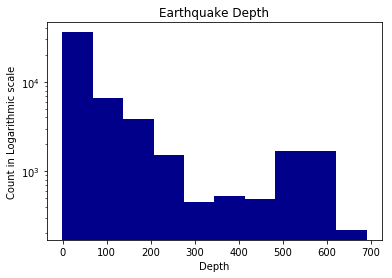

In [19]:
plt.hist(dfx['depth'],color='darkblue')#one color per dataset allowed
plt.yscale('log', nonposy='clip')
plt.title('Earthquake Depth')
plt.xlabel('Depth')
plt.ylabel('Count in Logarithmic scale');
#Bimodal distribtuion with most earthquakes occur above 300 km and between 500-600km.

10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20
points) Please add labels and colors to the plot.

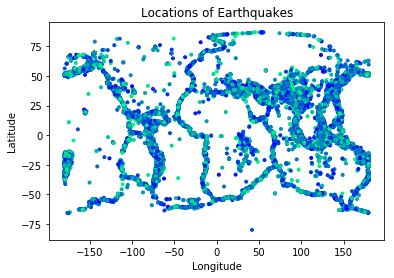

In [20]:
rng = np.random.RandomState(0)
colors = rng.rand(52954)
plt.scatter( dfx['longitude'],dfx['latitude'],c=colors, marker='.',cmap='winter')
plt.title('Locations of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

11) Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only
have data from the USA . You need to create a function that accommodates this. (20 points)

In [21]:
def usfilter(dfx):
    states=[]
    i=0
    while i <=50:
        states+=[str(us.states.STATES[i].name)]
        i+=1
    country=[]
    for place in list(dfx['place'].values):
        country+=[place.split(", ")[-1]]

    dfx['country']=country
    dfus=dfx[dfx.country.isin(states)].drop('country', axis=1)
    dfx=dfx.drop('country', axis=1)
    return dfus

In [22]:
dfus=usfilter(dfx)
dfx=dfx.drop('country', axis=1)
dfus=dfus[abs(dfus.longitude)>50]# removes Georgia country opposed to the state
dfus.head()

time  latitude  longitude  depth  mag magType  nst  \
9    2019-10-01T09:15:46.798Z   54.2032  -164.7525  71.31  4.2      mb  0.0   
19   2019-09-30T21:47:13.104Z   32.9215  -100.8600   5.00  4.0     mwr  0.0   
68   2019-09-29T16:45:00.152Z   56.3526  -148.9095  21.10  4.0      ml  0.0   
109  2019-09-27T23:27:32.950Z   53.3443  -165.7921  10.00  4.8     mwr  0.0   
122  2019-09-27T08:01:43.836Z   53.4520  -165.9343  47.34  4.1      mb  0.0   

       gap   dmin   rms  ...                         place        type  \
9     80.0  0.603  0.95  ...      67km E of Akutan, Alaska  earthquake   
19    30.0  0.068  0.99  ...     23km NNE of Snyder, Texas  earthquake   
68   259.0  2.466  0.36  ...    265km SE of Kodiak, Alaska  earthquake   
109   60.0  0.657  0.93  ...   76km SE of Unalaska, Alaska  earthquake   
122  189.0  0.602  0.97  ...   61km SE of Unalaska, Alaska  earthquake   

    horizontalError depthError magError  magNst    status  locationSource  \
9               5.6        7.8    0.084    39.0  reviewed              us   
19              3.4        2.0    0.037    71.0  reviewed              us   
68             10.3       11.9    0.042    74.0  reviewed              us   
109             4.0        1.8    0.071    19.0  reviewed              us   
122             5.0        8.1    0.135    15.0  reviewed              us   

     magSource  year  
9           us  2019  
19          us  2019  
68          us  2019  
109         us  2019  
122         us  2019  

[5 rows x 23 columns]

12) Using the cleaned US-only version of your dataset answer the following questions (30 points
total):
a) Find the top 10 US states where the strongest earthquakes occurred (10 points)
b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following
magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5:
(7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.
c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay
a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.


In [23]:
state=[]
for place in list(dfus['place'].values):
    state+=[place.split(", ")[-1]]

dfus['state']=state
print(dfus.groupby('state').count().sort_values('time', ascending=False)['time'].head(10))
dfus=dfus.drop('state', axis=1)

state
Alaska        1840
Hawaii          60
Oregon          51
California      43
Oklahoma        36
Idaho           35
Nevada          16
Montana         13
Colorado         4
Kansas           4
Name: time, dtype: int64


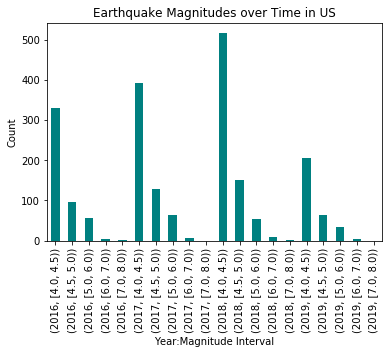

In [24]:
dates=[]
for date in list(dfus['time'].values):
    dates+=[date[:4]]

dfus['year']=dates

grouped=dfus.groupby(['year',pd.cut(dfus['mag'], np.array([4.0,4.5,5.0,6.0,7.0,dfus['mag'].max()]), right=False)], sort=True).count()['time']

### by dropping values that equal 7 we make interval exclusive  on 7.0 on both sides  
### and by adding .1 to max() we are inclusive on the right
### Graph will plot wrong interval with inclusive on the 7
dfy=dfus[dfus.mag != 7]
grouped=dfy.groupby(['year',pd.cut(dfy['mag'], np.array([4.0,4.5,5.0,6.0,7.0,dfy['mag'].max()+.1]),right=False)], sort=True).count()['time']
dfus.drop('year', axis=1)

grouped.plot(kind='bar',color=['teal'])
plt.title('Earthquake Magnitudes over Time in US')
plt.xlabel('Year:Magnitude Interval')
plt.ylabel('Count');

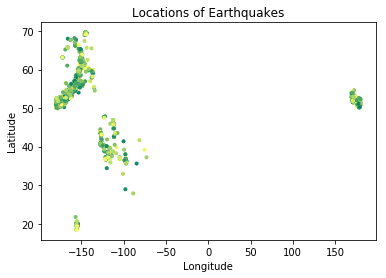

In [25]:
rng = np.random.RandomState(0)
colors = rng.rand(2121)
plt.scatter( dfus['longitude'],dfus['latitude'],c=colors, marker='.',cmap='summer')
plt.title('Locations of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [26]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = dfus['longitude'],
        lat = dfus['latitude'],
        mode = 'markers',
        marker_color = 'red',
        ))

fig.update_layout(
        title = 'Locations of Earthquakes',
        geo_scope='world',
        
    )
fig.show()